In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Dataset

In [33]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 標本分布

In [34]:
m = 100
n = 50
column = 'tip'
sample_means = []
for i in range(m):
    sampled_df = df.sample(50)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

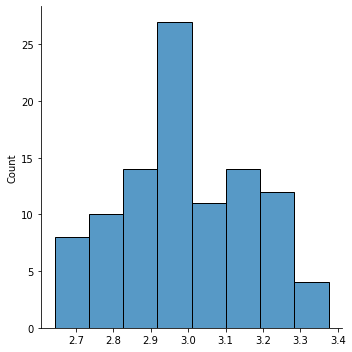

In [35]:
sns.displot(sample_means)

In [36]:
# 平均
np.mean(sample_means)

3.001952

In [37]:
# 母平均
df[column].mean()

2.99827868852459

In [38]:
# 分散
np.var(sample_means)

0.031681123296

In [39]:
# 母分散
np.var(df[column])/n

0.038132170249932824

## 不偏分散

In [40]:
stats.tvar(df['tip'])

1.914454638062471

In [41]:
np.var(df['tip'], ddof=1)

1.914454638062471

In [42]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [43]:
stats.tstd(df['tip'])

1.3836381890011822

In [44]:
np.std(df['tip'], ddof=1)

1.3836381890011822

## 不偏分散の不偏性

In [45]:
n = 50
m = 100
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_uvar = stats.tvar(sample_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)

In [46]:
sample_uvars

[2.3860253469387755,
 1.841983673469388,
 2.50268506122449,
 2.409986489795918,
 2.286964285714286,
 1.3869781224489797,
 3.0537795918367348,
 1.6186744897959184,
 1.4302297551020409,
 2.5336448979591837,
 1.9768491428571426,
 1.2967982040816326,
 1.8527935102040818,
 1.8391250612244896,
 2.3033242448979587,
 2.325709428571429,
 1.023312693877551,
 1.850896693877551,
 2.1063952653061224,
 1.820571591836735,
 1.4800411836734695,
 1.4308806530612248,
 1.3662489795918364,
 1.574080979591837,
 3.243973714285714,
 2.3695249387755104,
 1.1429706530612243,
 1.829191836734694,
 1.723517714285714,
 1.1882743265306122,
 1.9460857142857144,
 1.2311600408163266,
 1.7235026938775508,
 1.291241673469388,
 2.3609089387755104,
 1.7128865714285715,
 2.976839551020408,
 1.6531745306122452,
 2.1510295510204083,
 1.3436866938775514,
 1.2546507755102043,
 2.5687685306122447,
 2.211564244897959,
 1.674829224489796,
 1.4422828163265309,
 1.9620295510204084,
 0.6832550612244898,
 1.420342693877551,
 1.4060744

In [47]:
# 標本の不偏分散の平均
np.mean(sample_uvars)

1.9037482375510206

In [48]:
# 母分散
np.var(df[column])

1.9066085124966412

In [49]:
# 標本の分散の平均
np.mean(sample_vars)

1.8656732728000003